In [1]:
import numpy as np
from scipy.io import loadmat
from scipy.signal import savgol_filter
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
#matplotlib.rc('font', **font)
cstring = 'rgbcmyk'
import matplotlib as ml
%matplotlib inline
font = {'family' : 'Sans',
        'weight' : 'normal',
        'size'   : 16}
ml.rc('font', **font)
ml.rcParams['figure.figsize'] = (8.0, 5.0)
ml.rcParams['text.usetex'] =True
ml.rc('font', family='serif',size=16)

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
dpath = "/home/aghazary/Documents/MyWorks/TrilayerGraphene/MLProject/checkpoint/data/"
with open(dpath+'g2=-4_g3=-342_g4=133_Delta2=-0.npy', 'rb') as f:
    a1 = np.load(f)
with open(dpath+'g2=-16_g3=-249_g4=105_Delta2=11.npy', 'rb') as f:
    a2 = np.load(f)

In [4]:
a=2.46
Au = np.sqrt(3) * a**2 / 2
mult=Au*0.1

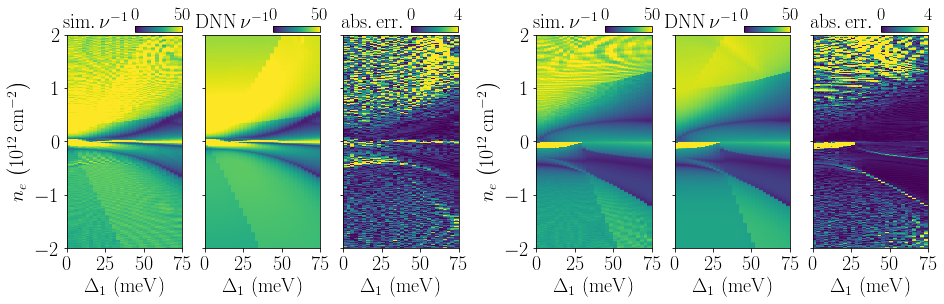

In [14]:
from matplotlib.gridspec import GridSpec
ml.rc('font', family='serif',size=20)
ml.rcParams['figure.figsize'] = (13.0, 4.2)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 6, figure=fig, height_ratios=[0.1,4])
ax1 = fig.add_subplot(gs[1, 0])
Cpl = (10 / Au)*(1/(0.000+a1[:,:,2]))
Cplp = (10 / Au)*(1/(0.000+a1[:,:,3]))
cmap = plt.get_cmap('PiYG')
vml = 0.0
vxl = 50
pc = ax1.pcolormesh(a1[:,:,0],a1[:,:,1],Cpl,vmin=vml,vmax=vxl,rasterized=True)
ax1.set_ylim([-2,2])
ax1.set_xlim([0,75])
ax1.set_xticks([0,25,50,75])
ax1.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=20)
ax1.set_ylabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$',fontsize=20)
cbaxes = fig.add_axes([0.14, 0.885, 0.05, 0.02])
cbar=plt.colorbar(pc, orientation="horizontal",cax=cbaxes)
cbar.ax.tick_params(size=0,labelsize=18)
cbar.ax.xaxis.set_ticks_position("top")
ax1.set_title(r"$\mathrm{sim.}\,\nu^{-1}$", x=0.25,fontsize=20)

ax2 = fig.add_subplot(gs[1, 1])
pc =ax2.pcolormesh(a1[:,:,0],a1[:,:,1],Cplp,vmin=vml,vmax=vxl,rasterized=True)
ax2.set_ylim([-2,2])
ax2.set_xlim([0,75])
ax2.set_xticks([0,25,50,75])
ax2.axes.yaxis.set_ticklabels([])
ax2.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=20)
cbaxes = fig.add_axes([0.287, 0.885, 0.05, 0.02])
cbar=plt.colorbar(pc, orientation="horizontal",cax=cbaxes)
cbar.ax.tick_params(size=0,labelsize=18)
cbar.ax.xaxis.set_ticks_position("top")
ax2.set_title(r"$\mathrm{DNN}\,\nu^{-1}$", x=0.24,fontsize=20)

ax3 = fig.add_subplot(gs[1, 2])
vml = 0.0
vxl = 4
pc =ax3.pcolormesh(a1[:,:,0],a1[:,:,1],np.abs(Cpl-Cplp),vmin=vml,vmax=vxl,rasterized=True)
ax3.set_ylim([-2,2])
ax3.set_xlim([0,75])
ax3.set_xticks([0,25,50,75])
ax3.axes.yaxis.set_ticklabels([])
ax3.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=20)
cbaxes = fig.add_axes([0.435, 0.885, 0.05, 0.02])
cbar=plt.colorbar(pc, orientation="horizontal",cax=cbaxes)
cbar.ax.tick_params(size=0,labelsize=18)
cbar.ax.xaxis.set_ticks([0,4])
cbar.ax.xaxis.set_ticks_position("top")
ax3.set_title(r"$\mathrm{abs.\, err.}$", x=0.25,fontsize=20)


ax4 = fig.add_subplot(gs[1, 3])
Cpl = (10 / Au)*(1/(0.000+a2[:,:,2]))
Cplp = (10 / Au)*(1/(0.00+a2[:,:,3]))
cmap = plt.get_cmap('PiYG')
vml = 0.0
vxl = 50
pc = ax4.pcolormesh(a2[:,:,0],a2[:,:,1],Cpl,vmin=vml,vmax=vxl,rasterized=True)
ax4.set_ylim([-2,2])
ax4.set_xlim([0,75])
ax4.set_xticks([0,25,50,75])
ax4.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=20)
ax4.set_ylabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$',fontsize=20)
cbaxes = fig.add_axes([0.642, 0.885, 0.05, 0.02])
cbar=plt.colorbar(pc, orientation="horizontal",cax=cbaxes)
cbar.ax.tick_params(size=0,labelsize=18)
cbar.ax.xaxis.set_ticks_position("top")
ax4.set_title(r"$\mathrm{sim.}\,\nu^{-1}$", x=0.25,fontsize=20)

ax5 = fig.add_subplot(gs[1, 4])
pc =ax5.pcolormesh(a2[:,:,0],a2[:,:,1],Cplp,vmin=vml,vmax=vxl,rasterized=True)
ax5.set_ylim([-2,2])
ax5.set_xlim([0,75])
ax5.set_xticks([0,25,50,75])
ax5.axes.yaxis.set_ticklabels([])
ax5.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=20)
cbaxes = fig.add_axes([0.79, 0.885, 0.05, 0.02])
cbar=plt.colorbar(pc, orientation="horizontal",cax=cbaxes)
cbar.ax.tick_params(size=0,labelsize=18)
cbar.ax.xaxis.set_ticks_position("top")
ax5.set_title(r"$\mathrm{DNN}\,\nu^{-1}$", x=0.24,fontsize=20)

ax6 = fig.add_subplot(gs[1, 5])
vml = 0.0
vxl = 4
pc =ax6.pcolormesh(a2[:,:,0],a2[:,:,1],np.abs(Cpl-Cplp),vmin=vml,vmax=vxl,rasterized=True)
ax6.set_ylim([-2,2])
ax6.set_xlim([0,75])
ax6.set_xticks([0,25,50,75])
ax6.axes.yaxis.set_ticklabels([])
ax6.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=20)
cbaxes = fig.add_axes([0.937, 0.885, 0.05, 0.02])
cbar=plt.colorbar(pc, orientation="horizontal",cax=cbaxes)
cbar.ax.tick_params(size=0,labelsize=18)
cbar.ax.xaxis.set_ticks_position("top")
cbar.ax.xaxis.set_ticks([0,4])
ax6.set_title(r"$\mathrm{abs.\, err.}$", x=0.25,fontsize=20)
#plt.tight_layout(pad=0)
plt.savefig('fig2.pdf')

In [16]:
(340-242)/7

14.0

In [21]:
dpath = "/home/aghazary/Documents/MyWorks/TrilayerGraphene/CFiles/DOSCodeMLABA/MLProgram/"
with open(dpath+'DOSNDTruePlot43.npy', 'rb') as f:
    a1 = np.load(f)
with open(dpath+'DOSNDPredPlot43.npy', 'rb') as f:
    a2 = np.load(f)

In [22]:
nul=np.linspace(-2,2,4000,endpoint=False)
f1=np.array([interp1d(a1[i,:,2], a1[i,:,3], kind='linear') for i in range(len(a1))])
f2=np.array([interp1d(a2[i,:,2], a2[i,:,3], kind='linear') for i in range(len(a2))])
a1 = np.moveaxis(np.array([np.array([a1[i,0,0]*np.ones(nul.shape),nul,f1[i](nul),f2[i](nul)]) for i in range(len(a1))]),1,-1)

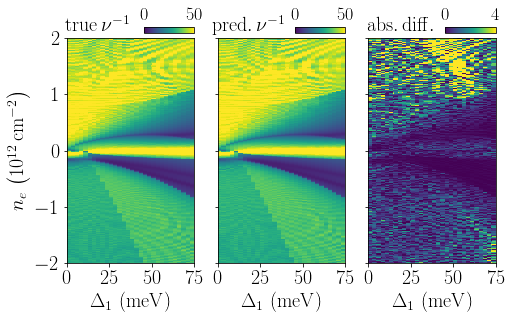

In [23]:
from matplotlib.gridspec import GridSpec
ml.rc('font', family='serif',size=20)
ml.rcParams['figure.figsize'] = (7, 4.4)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(2, 3, figure=fig, height_ratios=[0.1,4])
ax1 = fig.add_subplot(gs[1, 0])
Cpl = (10 / Au)*(1/(0.001+a1[:,:,2]))
Cplp = (10 / Au)*(1/(0.001+a1[:,:,3]))
cmap = plt.get_cmap('PiYG')
vml = 0.0
vxl = 50
pc = ax1.pcolormesh(a1[:,:,0],a1[:,:,1],Cpl,vmin=vml,vmax=vxl,rasterized=True)
ax1.set_ylim([-2,2])
ax1.set_xlim([0,75])
ax1.set_xticks([0,25,50,75])
ax1.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=20)
ax1.set_ylabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$',fontsize=20)
cbaxes = fig.add_axes([0.277, 0.89, 0.1, 0.02])
cbar=plt.colorbar(pc, orientation="horizontal",cax=cbaxes)
cbar.ax.tick_params(size=0,labelsize=18)
cbar.ax.xaxis.set_ticks_position("top")
ax1.set_title(r"$\mathrm{true}\,\nu^{-1}$", x=0.24,fontsize=20)

ax2 = fig.add_subplot(gs[1, 1])
pc =ax2.pcolormesh(a1[:,:,0],a1[:,:,1],Cplp,vmin=vml,vmax=vxl,rasterized=True)
ax2.set_ylim([-2,2])
ax2.set_xlim([0,75])
ax2.set_xticks([0,25,50,75])
ax2.axes.yaxis.set_ticklabels([])
ax2.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=20)
cbaxes = fig.add_axes([0.577, 0.89, 0.1, 0.02])
cbar=plt.colorbar(pc, orientation="horizontal",cax=cbaxes)
cbar.ax.tick_params(size=0,labelsize=18)
cbar.ax.xaxis.set_ticks_position("top")
ax2.set_title(r"$\mathrm{pred.}\,\nu^{-1}$", x=0.24,fontsize=20)

ax3 = fig.add_subplot(gs[1, 2])
vml = 0.0
vxl = 4
pc =ax3.pcolormesh(a1[:,:,0],a1[:,:,1],np.abs(Cpl-Cplp),vmin=vml,vmax=vxl,rasterized=True)
ax3.set_ylim([-2,2])
ax3.set_xlim([0,75])
ax3.set_xticks([0,25,50,75])
ax3.axes.yaxis.set_ticklabels([])
ax3.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=20)
cbaxes = fig.add_axes([0.875, 0.89, 0.1, 0.02])
cbar=plt.colorbar(pc, orientation="horizontal",cax=cbaxes)
cbar.ax.tick_params(size=0,labelsize=18)
cbar.ax.xaxis.set_ticks([0,4])
cbar.ax.xaxis.set_ticks_position("top")
ax3.set_title(r"$\mathrm{abs.\, diff.}$", x=0.25,fontsize=20)
plt.savefig('fig3b.pdf')

In [15]:
dataset.to_csv(dpath+'param.csv', sep='\t')

In [5]:
dataset = pd.DataFrame({r'$\gamma_2$': a[:, 0], r'$\gamma_3$': a[:, 1],r'$\gamma_4$': a[:, 2],r'$\Delta_2$': a[:, 3]})

In [3]:
dpath="/home/aghazary/Dropbox/Dropbox Transfer files/trilayer/trilayer/data/"
M = loadmat(dpath+'d9.mat')

In [4]:
d9 = M['d9']
x_indices = d9[:, 0]
y_indices = d9[:, 1]
width = int(np.max(x_indices)) + 1
height = int(np.max(y_indices)) + 1
C_p, p, nl = map(lambda x: x.reshape([height, width]), (d9[:, 4], d9[:, 6], d9[:, 7]))
nl *= 0.9418  
D1 = p * 3.25 / 40

In [5]:
dpath = "/home/aghazary/Documents/StonerABAData/"
dmu = 0.002
mulABA = np.arange(-150,150.0001,dmu)
DlistABA = np.arange(0,120.1,0.5)
with open(dpath+'U0.0KV0.0KDataABAGrapheneABA.npy', 'rb') as f:
    a4ABA = np.load(f)
mulABA = mulABA[1:-1]
nuTABA = a4ABA[:,1:-1]
dosABA = (a4ABA[:,2:]-a4ABA[:,0:-2]) / (2*dmu)
fdtABA = np.array([interp1d(nuTABA[i], dosABA[i], kind='linear') for i in range(len(nuTABA))])

with open(dpath+'U0.0KV0.0KDataABAGrapheneML.npy', 'rb') as f:
    a4ML = np.load(f)
nuTML = a4ML[:,1:-1]
dosML = (a4ML[:,2:]-a4ML[:,0:-2]) / (2*dmu)
fdtML = np.array([interp1d(nuTML[i], dosML[i], kind='linear') for i in range(len(nuTML))])

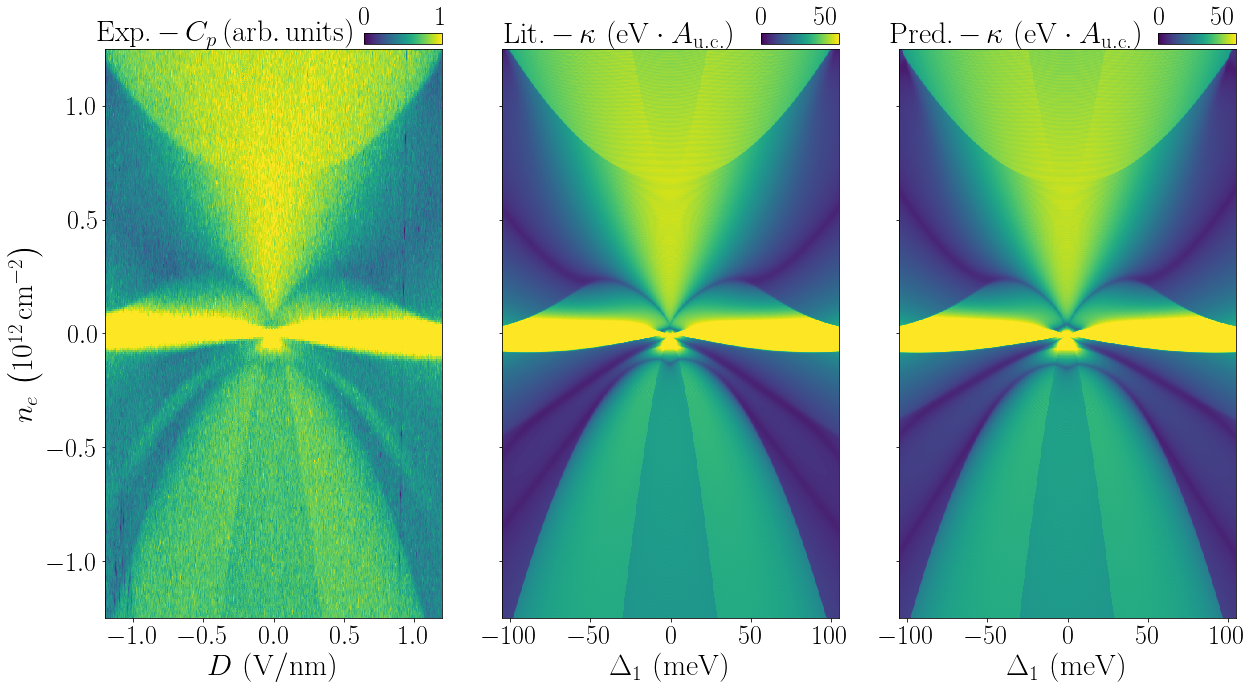

In [8]:
from matplotlib.gridspec import GridSpec
ml.rc('font', family='serif',size=26)
ml.rcParams['figure.figsize'] = (18, 10.0)
ml.rcParams['contour.negative_linestyle']= 'solid'
fig = plt.figure(constrained_layout=True)
gs = GridSpec(1, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
#cmap = plt.get_cmap('PiYG')
vmax = np.max(C_p)
vmin = np.min(C_p)
C_p = 4.4*(C_p - vmin)/(vmax-vmin)
vml = 0.0
vxl = 1.0
pc = ax1.pcolormesh(D1, nl, C_p,vmin = vml, vmax=vxl,rasterized=True)
ax1.set_ylim([-1.25,1.25])
ax1.set_xlim([-1.2,1.2])
ax1.set_xticks([-1.0,-0.5,0,0.5,1.0])
ax1.set_xlabel(r'$D\,\left({\rm V/nm}\right)$',fontsize=30)
ax1.set_ylabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$',fontsize=30)
cbaxes = fig.add_axes([0.297, 0.925, 0.06, 0.015])
cbar=plt.colorbar(pc, orientation="horizontal",cax=cbaxes)
cbar.ax.tick_params(size=0,labelsize=26)
cbar.ax.xaxis.set_ticks_position("top")
ax1.set_title(r"Exp.$\,-\,C_p\left(\mathrm{arb.\,units}\right)$", x=0.36,fontsize=30)

ax2 = fig.add_subplot(gs[0, 1])
nul = np.arange(-1.25,1.25,0.001)
Dfl = np.arange(-120,120,0.5)
ind = np.where(np.abs(np.abs(Dfl[-1])-DlistABA)<0.01)[0][0]
Cpl = (10 / Au)*np.array([1/(0.0002+fdtABA[i](nul)) for i in np.concatenate((range(ind,0,-1),range(ind+1)))])
vml = 0.0
vxl = 60
pc = ax2.pcolormesh(Dfl, nul, Cpl.T, vmin = vml, vmax=vxl,rasterized=True)
ax2.set_ylim([-1.25,1.25])
ax2.set_xlim([-105,105])
ax2.set_yticklabels([])
ax2.set_xticks([-100,-50,0,50,100])
ax2.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=30)
#ax2.set_ylabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$',fontsize=20)
cbaxes = fig.add_axes([0.6035, 0.925, 0.06, 0.015])
cbar=plt.colorbar(pc, orientation="horizontal",cax=cbaxes)
cbar.ax.tick_params(size=0,labelsize=26)
cbar.ax.xaxis.set_ticks_position("top")
ax2.set_title(r"Lit.$\,-\,\kappa\,\left({\rm eV} \cdot A_{\rm u.c.}\right)$", x=0.35,fontsize=30)

ax3 = fig.add_subplot(gs[0, 2])
Cpl = (10 / Au)*np.array([1/(0.0002+fdtML[i](nul)) for i in np.concatenate((range(ind,0,-1),range(ind+1)))])
vml = 0.0
vxl = 60
pc = ax3.pcolormesh(Dfl, nul, Cpl.T,vmin = vml, vmax=vxl,rasterized=True)
ax3.set_ylim([-1.25,1.25])
ax3.set_xlim([-105,105])
ax3.set_xlabel(r'$\Delta_1\,\left({\rm meV}\right)$',fontsize=30)
ax3.set_yticklabels([])
ax3.set_xticks([-100,-50,0,50,100])
#ax3.set_ylabel(r'$n_e\, \left(10^{12}\, {\rm cm}^{-2}\right)$',fontsize=20)
cbaxes = fig.add_axes([0.91, 0.925, 0.06, 0.015])
cbar=plt.colorbar(pc, orientation="horizontal",cax=cbaxes)
cbar.ax.tick_params(size=0,labelsize=26)
cbar.ax.xaxis.set_ticks_position("top")
ax3.set_title(r"Pred.$\,-\,\kappa\,\left({\rm eV} \cdot A_{\rm u.c.}\right)$", x=0.35,fontsize=30)

plt.tight_layout()
plt.savefig("ExpComparison1.pdf")

In [57]:
0.334/2

0.167

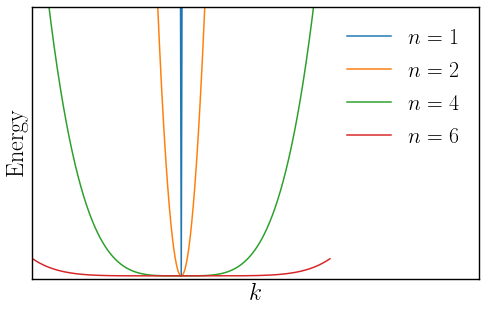

In [22]:
ml.rcParams['axes.linewidth'] = 1.4
k=np.linspace(-0.2,0.2,2000, endpoint=False)
plt.plot(k, 1000*np.abs(k),label=r'$n=1$')
plt.plot(k, 1000*np.abs(k)**2,label=r'$n=2$')
plt.plot(k, 1000*np.abs(k)**4,label=r'$n=4$')
plt.plot(k, 1000*np.abs(k)**6,label=r'$n=6$')
plt.ylim([-0.01,1])
plt.xlim([-0.2,0.4])
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
plt.legend(frameon=False,fontsize=22)
plt.xlabel(r'$k$',fontsize=24)
plt.ylabel(r'Energy',fontsize=24)
plt.savefig('EnergyK.png',dpi=200)

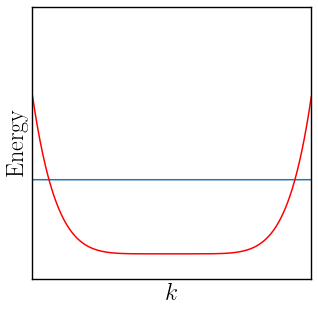

In [29]:
ml.rcParams['figure.figsize'] = (5.0, 5.0)
ml.rcParams['axes.linewidth'] = 1.4
k=np.linspace(-0.2,0.2,2000, endpoint=False)
plt.plot(k, 0.03*np.ones(k.shape))
plt.plot(k, 1000*np.abs(k)**6,label=r'$n=6$',c="r")
plt.ylim([-0.01,0.1])
plt.xlim([-0.2,0.2])
frame1 = plt.gca()
frame1.axes.get_xaxis().set_ticks([])
frame1.axes.get_yaxis().set_ticks([])
#plt.legend(frameon=False,fontsize=22)
plt.xlabel(r'$k$',fontsize=24)
plt.ylabel(r'Energy',fontsize=24)
plt.savefig('EnergyK.png',dpi=200)